In [1]:
import os
import pickle
from natsort import natsorted
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib
%matplotlib inline

from mynotebooks.results_utils import *


## My analysis on ERM model 
- Identify if there are any significant disparities across possible subgroups in baseline MIMIC classification model
- Analyse accuracy, precision, recall and also look at n and prevalence
- Also analyse possible intersectional disparities

### Data pre-processing on train, test and val data

In [2]:
path_to_test_preds = '/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/yourpath/fariness_data/model_records/MIMIC_CXR/Sex/cusResNet18/baseline/pred.csv'
path_to_test_splits = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/data/mimic-cxr/splits/test.csv'
test_df = preprocess_mimic_data(path_to_test_preds,path_to_test_splits)

In [3]:
# check that indexes in both dfs correspond to same image
pred_df = pd.read_csv(path_to_test_preds)
pred_df = pred_df.set_index('index')
true_df = pd.DataFrame(test_df['binary_label'].sort_index() == pred_df['label'].sort_index())
true_df.value_counts()

True    30316
dtype: int64

In [4]:
path_to_train_preds = '/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/yourpath/fariness_data/model_records/MIMIC_CXR/Sex/cusResNet18/baseline/pretrained_epoch_9_train_pred.csv'
path_to_train_splits = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/data/mimic-cxr/splits/train.csv'
train_df = preprocess_mimic_data(path_to_train_preds,path_to_train_splits)

In [5]:
path_to_val_preds = '/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/yourpath/fariness_data/model_records/MIMIC_CXR/Sex/cusResNet18/baseline/pretrained_epoch_9_val_pred.csv'
path_to_val_splits = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/data/mimic-cxr/splits/val.csv'
val_df = preprocess_mimic_data(path_to_val_preds,path_to_val_splits)

## ANALYSE POSSIBLE BIASES IN ERM MODEL

### PERFORMED PROCEDURE

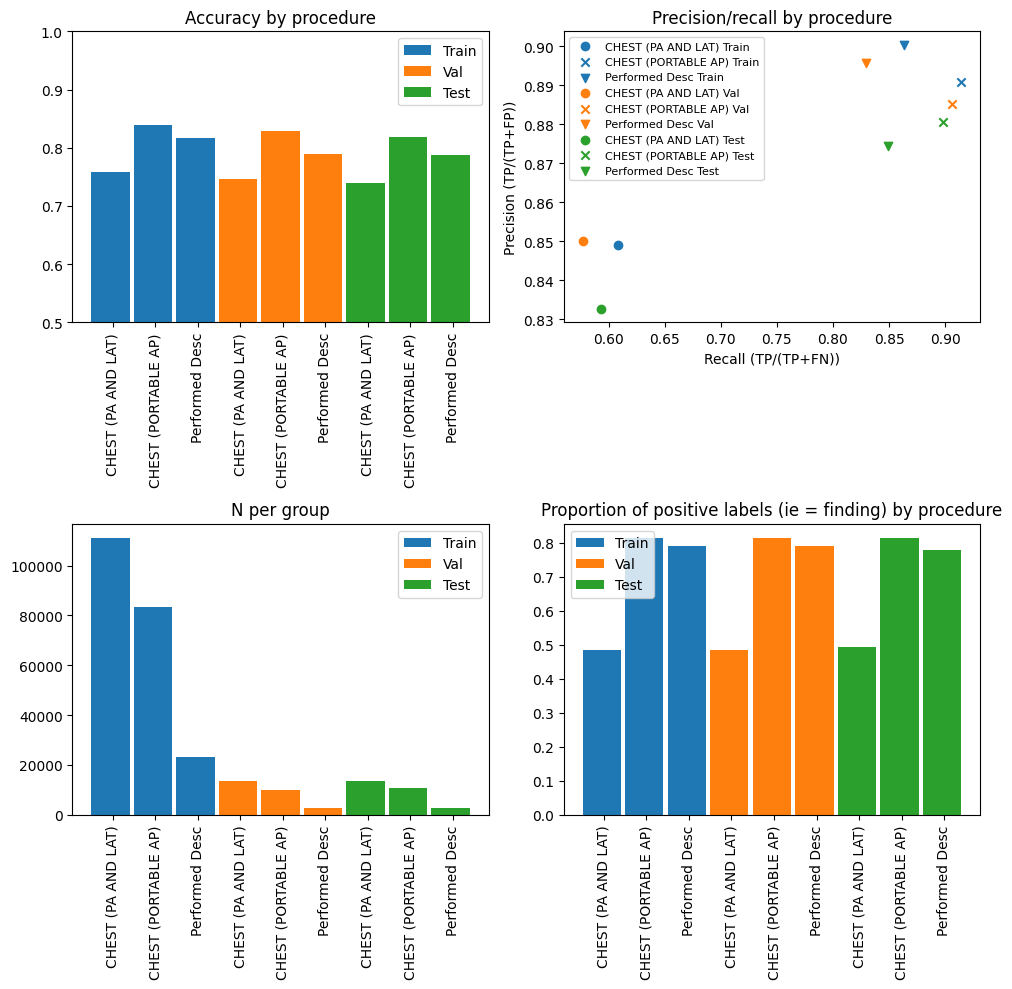

In [6]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'procedure','PerformedProcedureStepDescription',filter_group_size=True,min_size = 0.05)

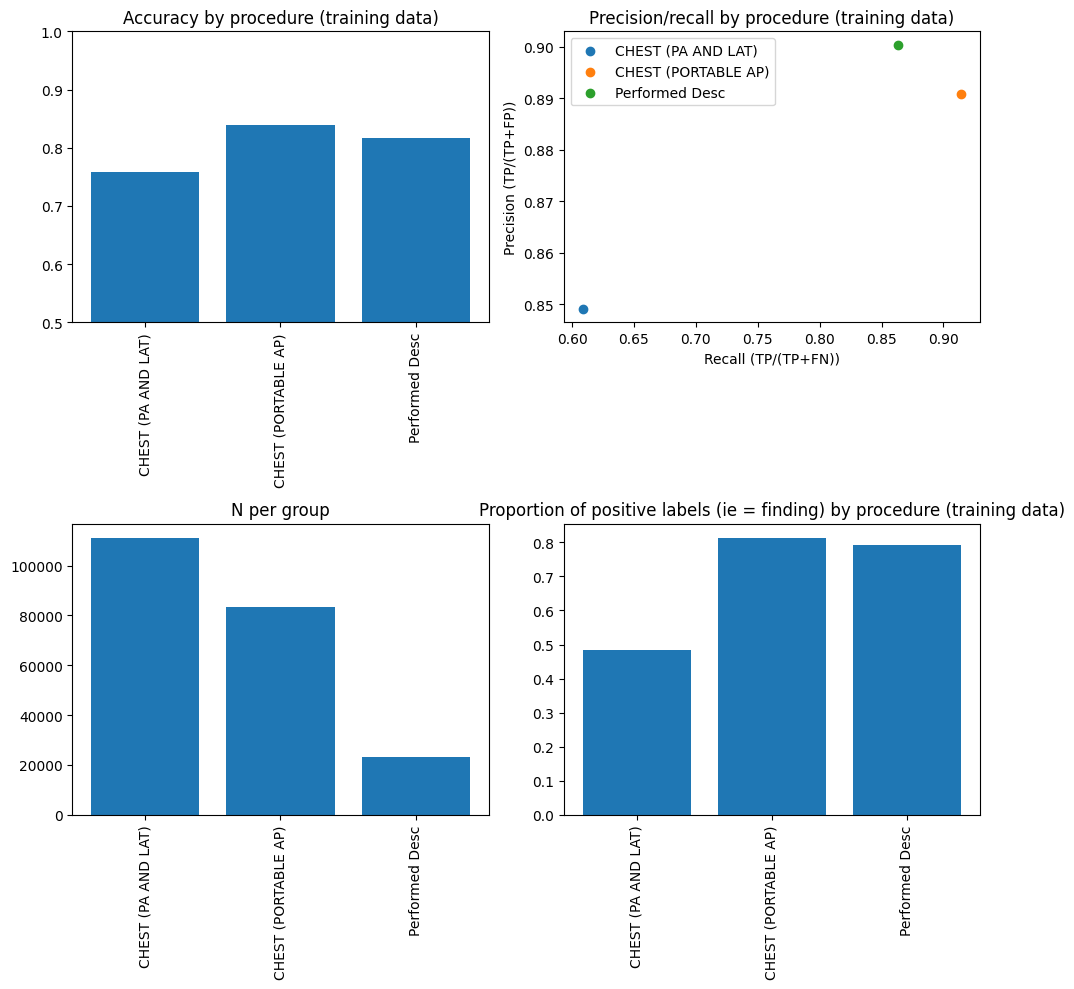

In [7]:
visualise_results(train_df,'procedure (training data)','PerformedProcedureStepDescription',filter_group_size=True,min_size=0.05)

/tmp/slurm-44957163/ipykernel_146490/1614970198.py:15: RuntimeWarning: invalid value encountered in long_scalars
  precision = grouped_df.apply(lambda group: (group['TP']).sum()/((group['TP']).sum()+(group['FP']).sum()))[mask]
/tmp/slurm-44957163/ipykernel_146490/1614970198.py:16: RuntimeWarning: invalid value encountered in long_scalars
  recall = grouped_df.apply(lambda group: (group['TP']).sum()/((group['FN']).sum()+(group['TP']).sum()))[mask]


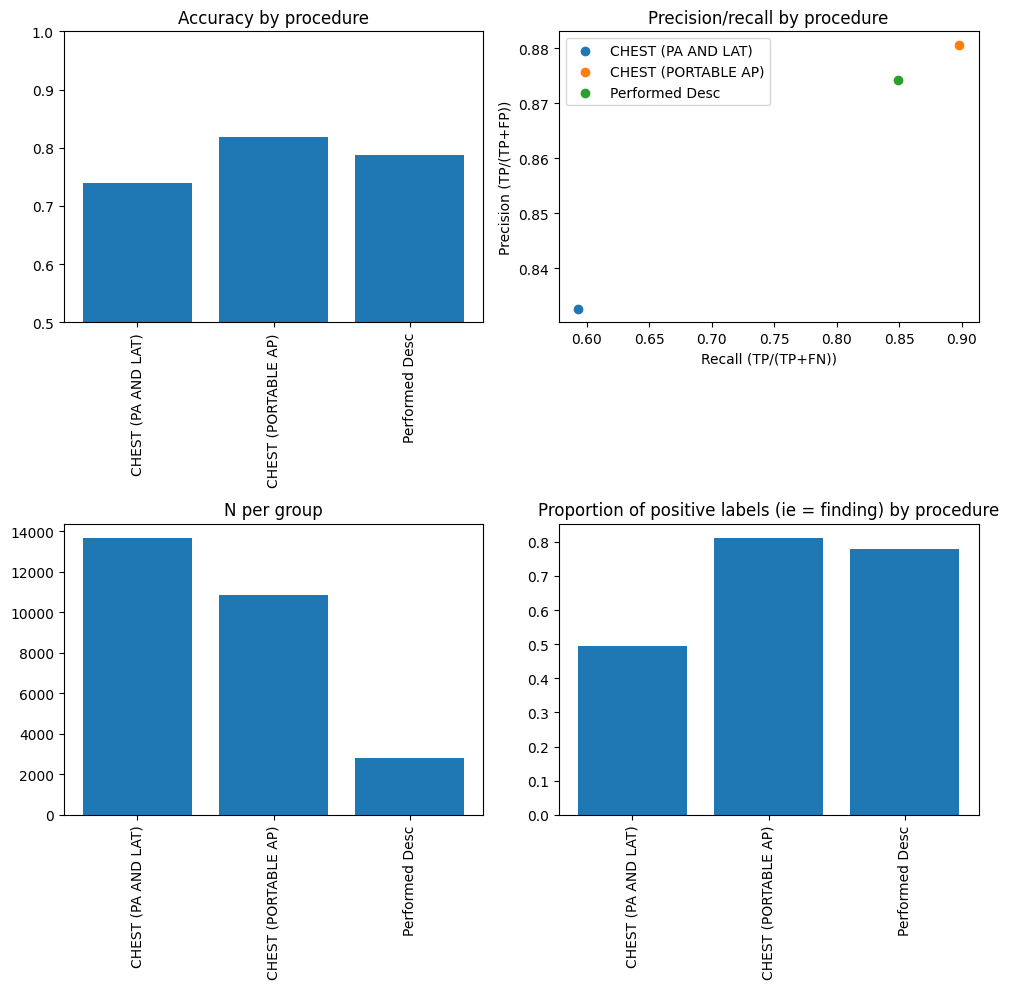

In [22]:
visualise_results(test_df,'procedure','PerformedProcedureStepDescription',filter_group_size=True,min_size=0.05)
# this suggests for the non-portable ap, for the predictions it's making, most are correct, however it is missing a lot of true positive images 

## AGE 

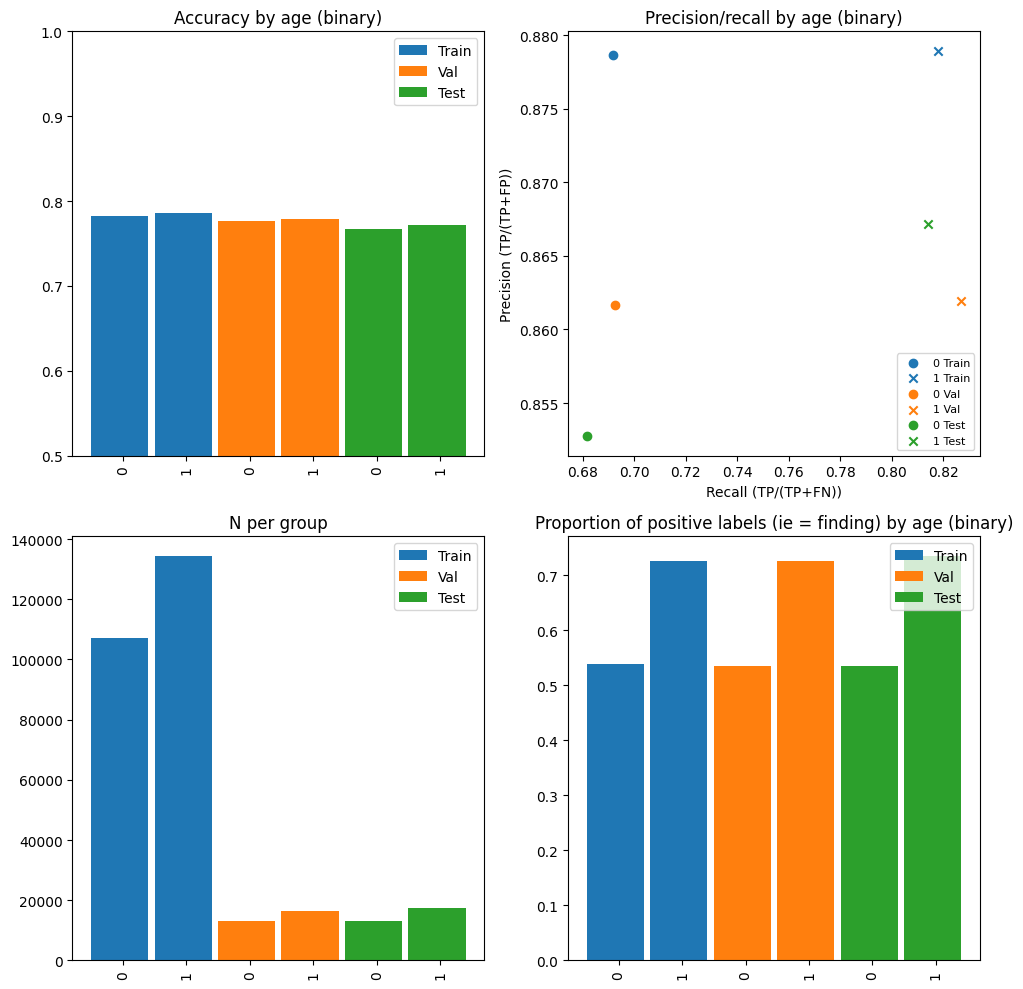

In [126]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'age (binary)','Age_binary',filter_group_size=True,min_size = 0.05)

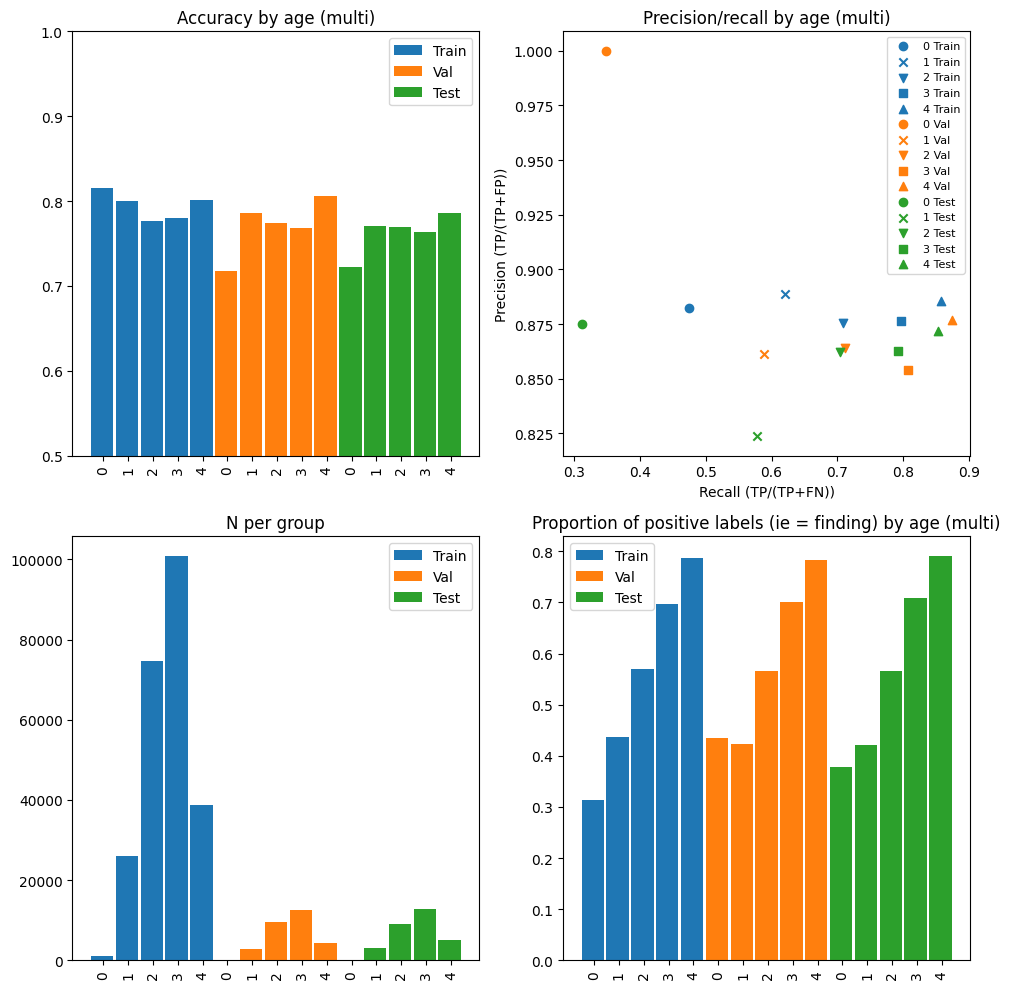

In [127]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'age (multi)','Age_multi',filter_group_size=False,min_size = 0.05)

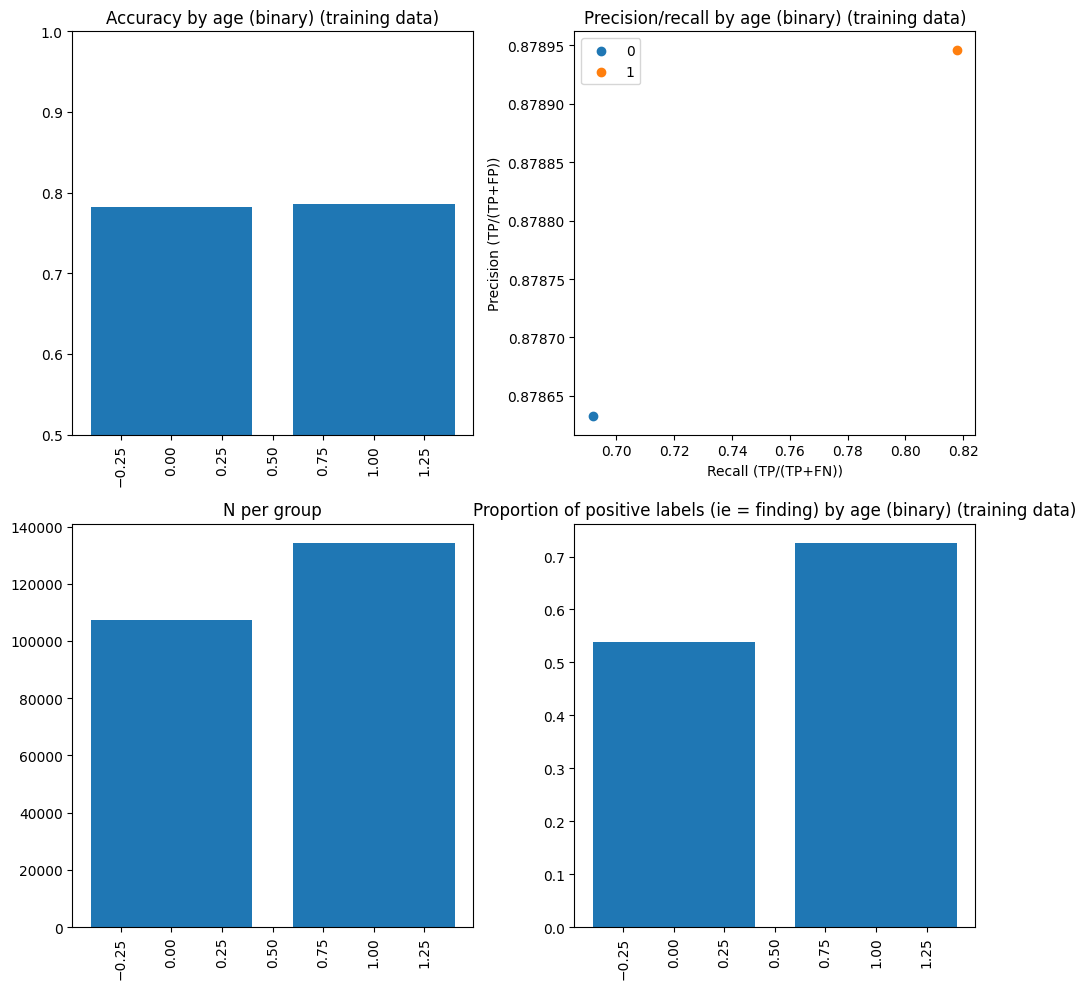

In [34]:
visualise_results(train_df,'age (binary) (training data)','Age_binary',filter_group_size=True,min_size=0.05)

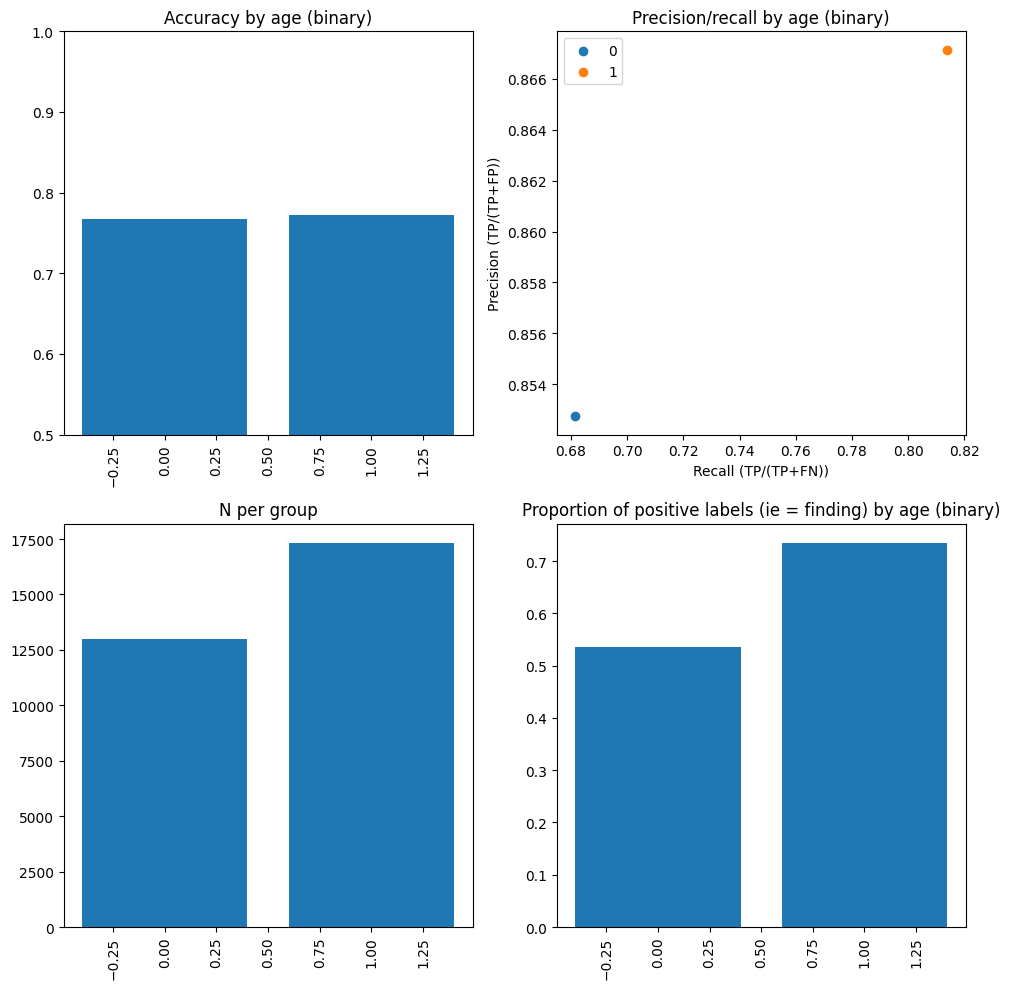

In [23]:
visualise_results(test_df,'age (binary)','Age_binary',filter_group_size=True,min_size=0.05)
# group 0 = 0-60, group 1 = 60+

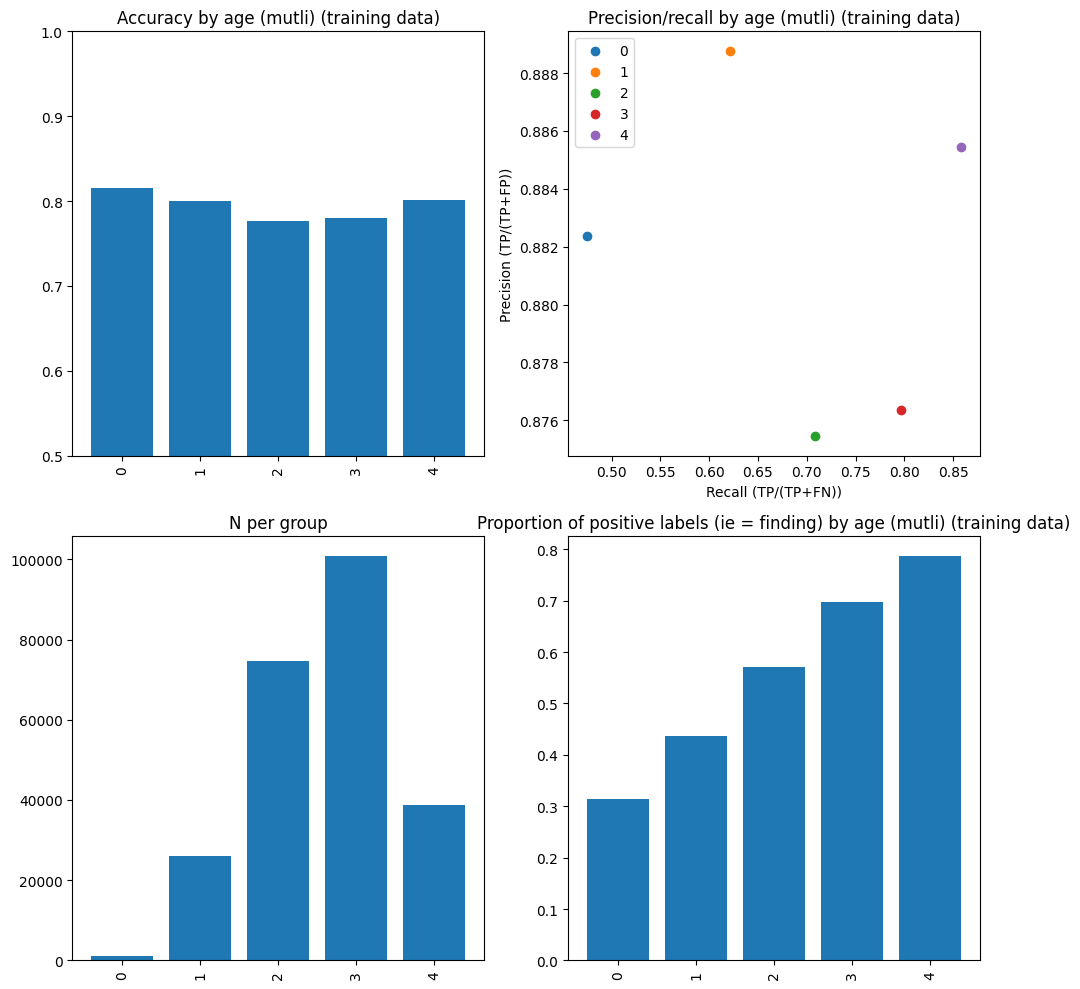

In [35]:
visualise_results(train_df,'age (multi) (training data)','Age_multi',filter_group_size=True,min_size=0.05)

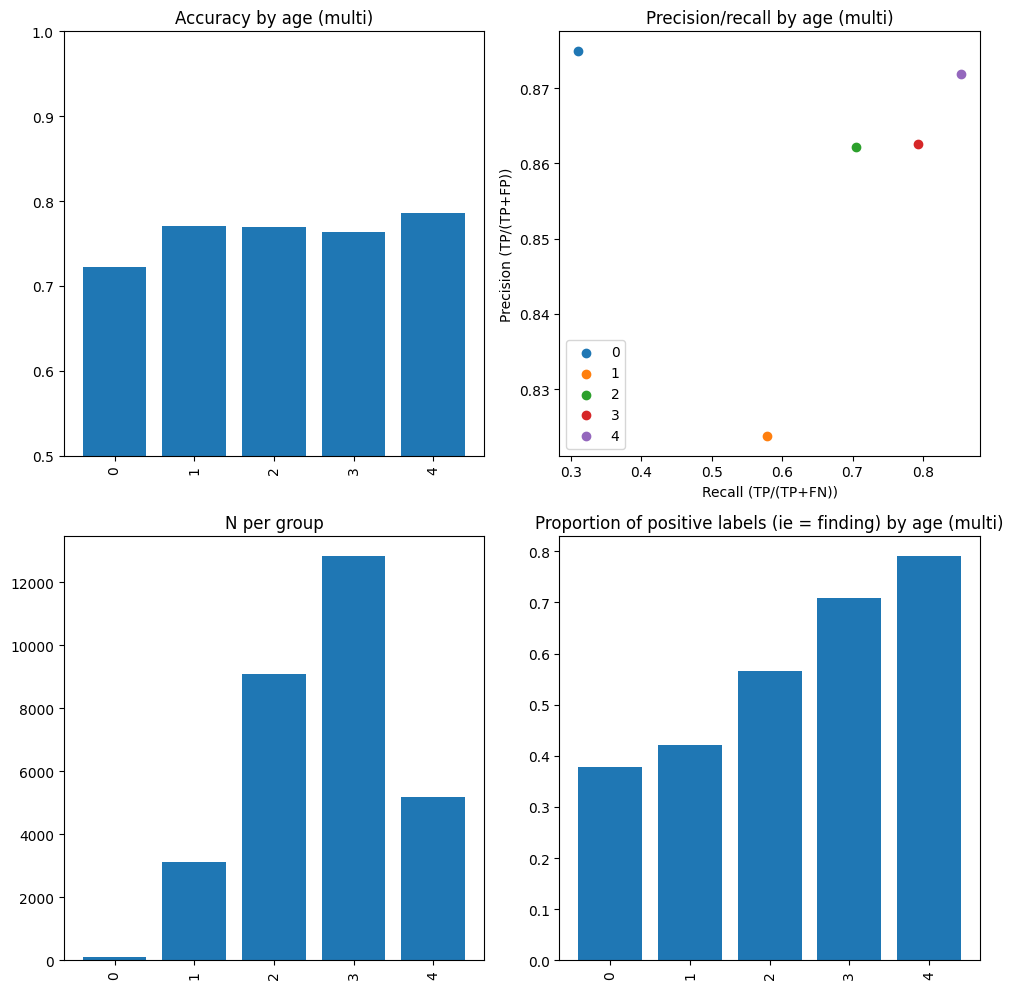

In [24]:
visualise_results(test_df,'age (multi)','Age_multi',filter_group_size=False,min_size=0.05)

## SEX

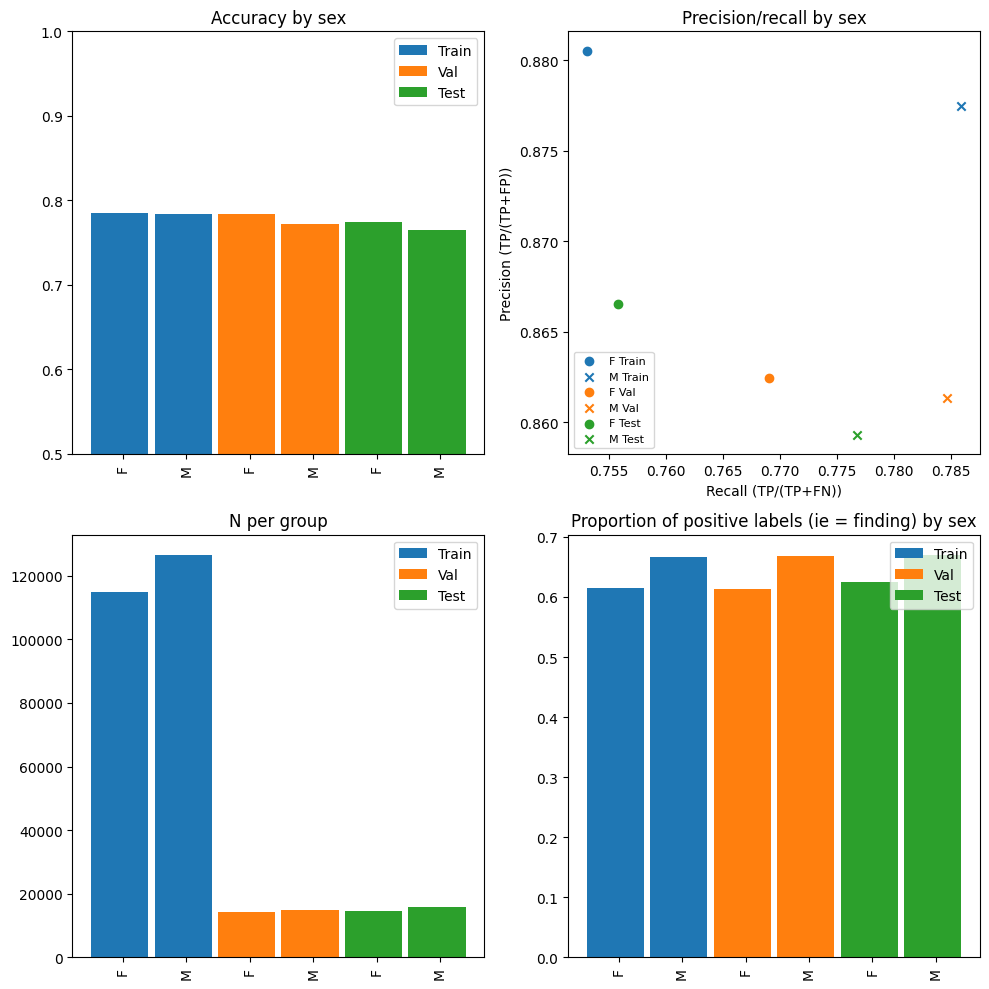

In [128]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'sex','Sex',filter_group_size=False,min_size = 0.05)

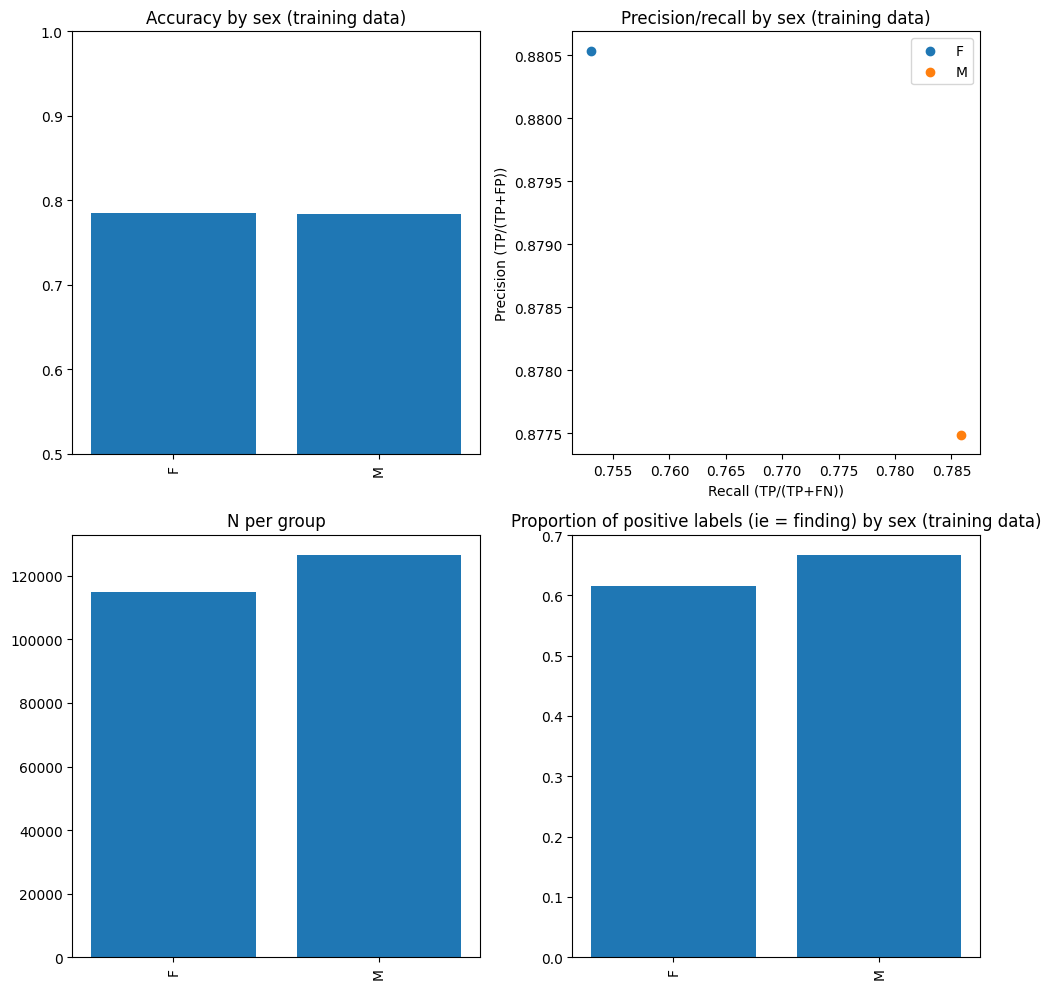

In [36]:
visualise_results(train_df,'sex (training data)','Sex',filter_group_size=True,min_size=0.05)

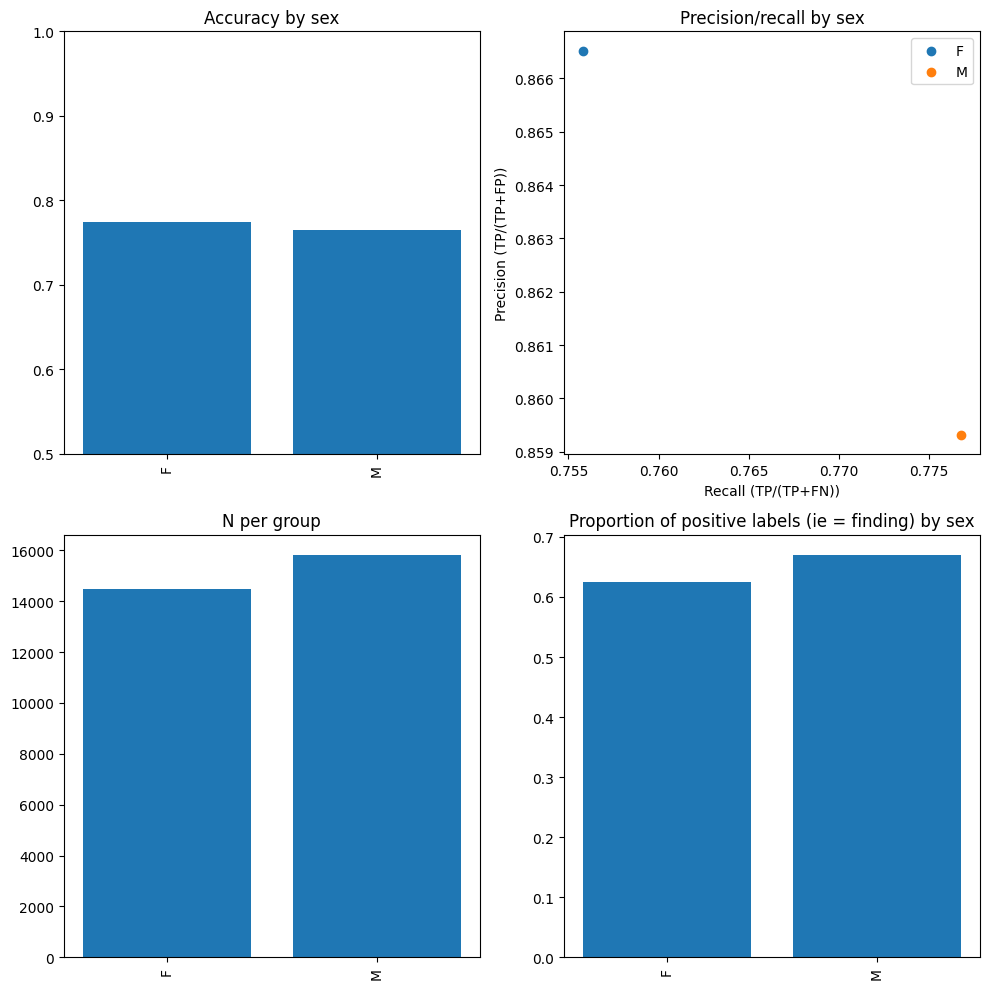

In [25]:
visualise_results(test_df,'sex','Sex',filter_group_size=False,min_size=0.05)

## ETHNICITY

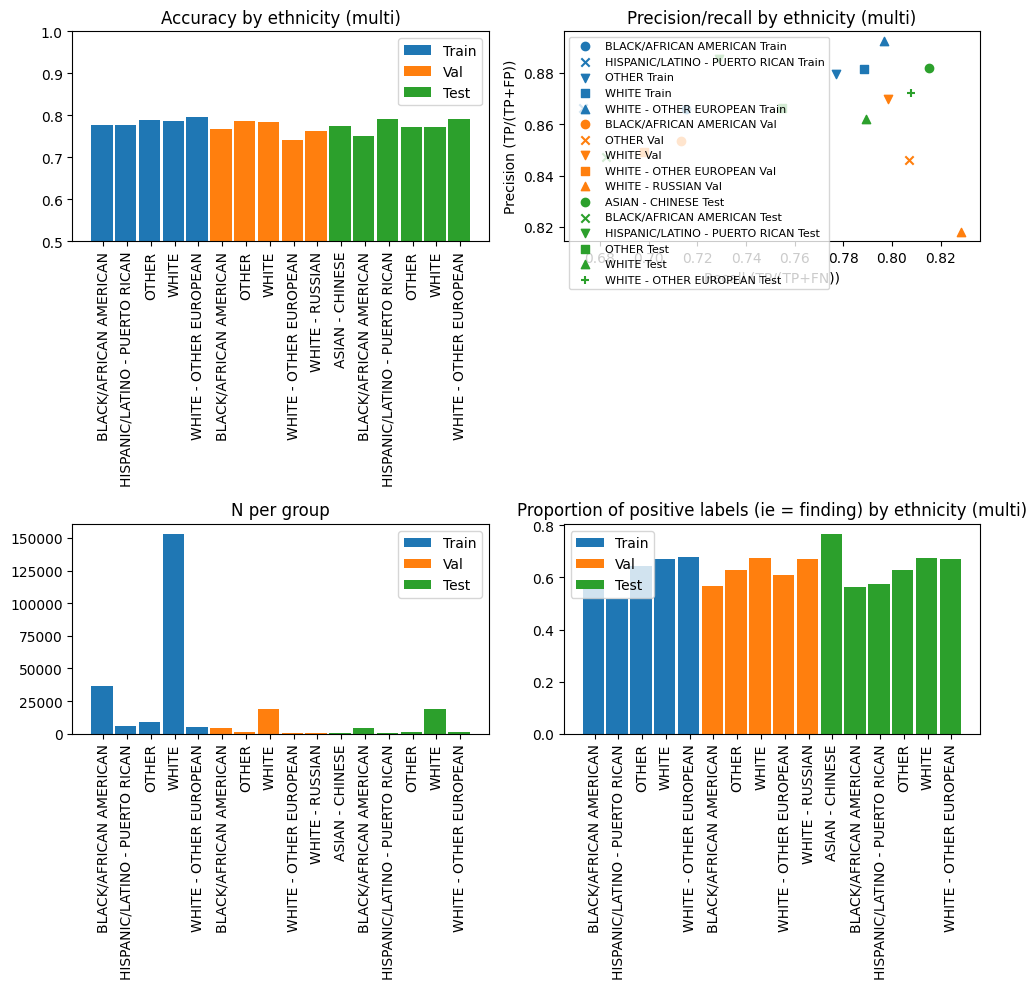

In [135]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'ethnicity (multi)','Race_multi',filter_group_size=True,min_size = 0.02)

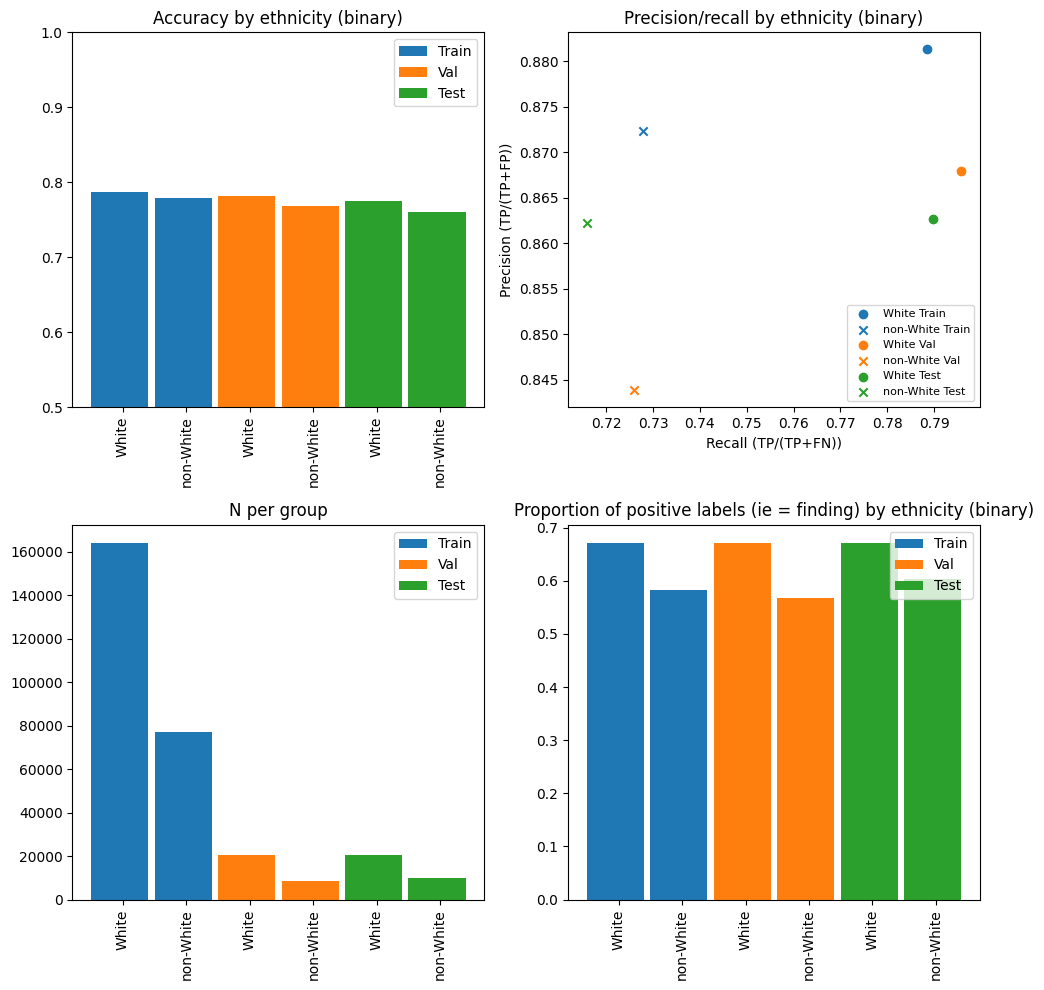

In [138]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'ethnicity (binary)','Race',filter_group_size=True,min_size = 0.02)

In [139]:
train_df['Race_cat'] = train_df['Race_multi'].apply(lambda x: 'White' if x=='WHITE' else 
                                       'White-other' if 'WHITE -' in x else 
                                       'Hispanic' if 'HISPANIC' in x or 'LATINO' in x or 'MEXICAN' in x or 'CENTRAL AMERICAN' in x or 'CUBAN' in x or 'SALVADORAN' in x or 'GUATEMALAN' in x or 'DOMINICAN' in x or 'COLOMBIAN' in x or 'HONDURAN' in x else 
                                       'Asian' if 'ASIAN' in x or 'CHINESE' in x or 'KOREAN' in x or 'SOUTH EAST ASIAN' in x or 'ASIAN INDIAN' in x else 
                                       'Black' if 'BLACK' in x or 'AFRICAN AMERICAN' in x or 'CARIBBEAN ISLAND' in x or 'CAPE VERDEAN' in x else 
                                       'Other')
test_df['Race_cat'] = test_df['Race_multi'].apply(lambda x: 'White' if x=='WHITE' else 
                                       'White-other' if 'WHITE -' in x else 
                                       'Hispanic' if 'HISPANIC' in x or 'LATINO' in x or 'MEXICAN' in x or 'CENTRAL AMERICAN' in x or 'CUBAN' in x or 'SALVADORAN' in x or 'GUATEMALAN' in x or 'DOMINICAN' in x or 'COLOMBIAN' in x or 'HONDURAN' in x else 
                                       'Asian' if 'ASIAN' in x or 'CHINESE' in x or 'KOREAN' in x or 'SOUTH EAST ASIAN' in x or 'ASIAN INDIAN' in x else 
                                       'Black' if 'BLACK' in x or 'AFRICAN AMERICAN' in x or 'CARIBBEAN ISLAND' in x or 'CAPE VERDEAN' in x else 
                                       'Other')
val_df['Race_cat'] = val_df['Race_multi'].apply(lambda x: 'White' if x=='WHITE' else 
                                       'White-other' if 'WHITE -' in x else 
                                       'Hispanic' if 'HISPANIC' in x or 'LATINO' in x or 'MEXICAN' in x or 'CENTRAL AMERICAN' in x or 'CUBAN' in x or 'SALVADORAN' in x or 'GUATEMALAN' in x or 'DOMINICAN' in x or 'COLOMBIAN' in x or 'HONDURAN' in x else 
                                       'Asian' if 'ASIAN' in x or 'CHINESE' in x or 'KOREAN' in x or 'SOUTH EAST ASIAN' in x or 'ASIAN INDIAN' in x else 
                                       'Black' if 'BLACK' in x or 'AFRICAN AMERICAN' in x or 'CARIBBEAN ISLAND' in x or 'CAPE VERDEAN' in x else 
                                       'Other')

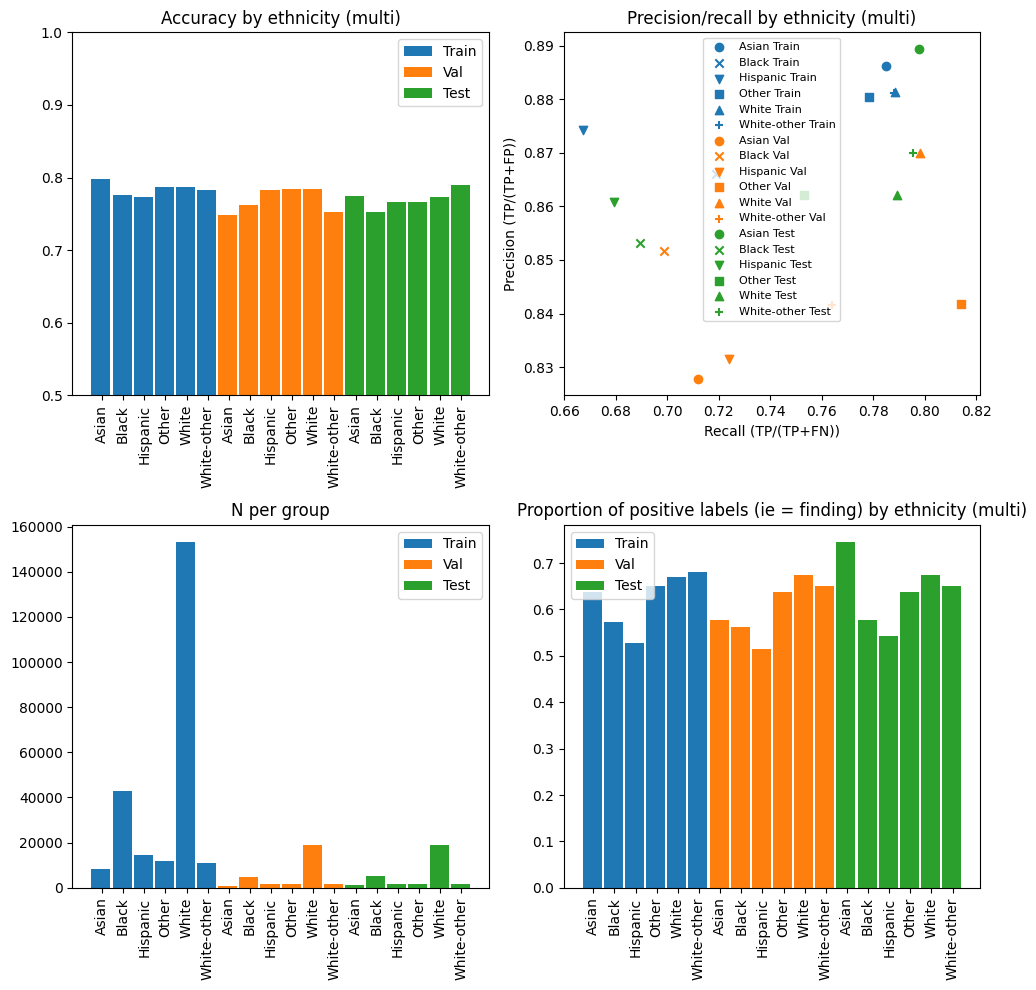

In [140]:
visualise_all_results([train_df,val_df,test_df],['Train','Val','Test'],'ethnicity (multi)','Race_cat',filter_group_size=True,min_size = 0.02)

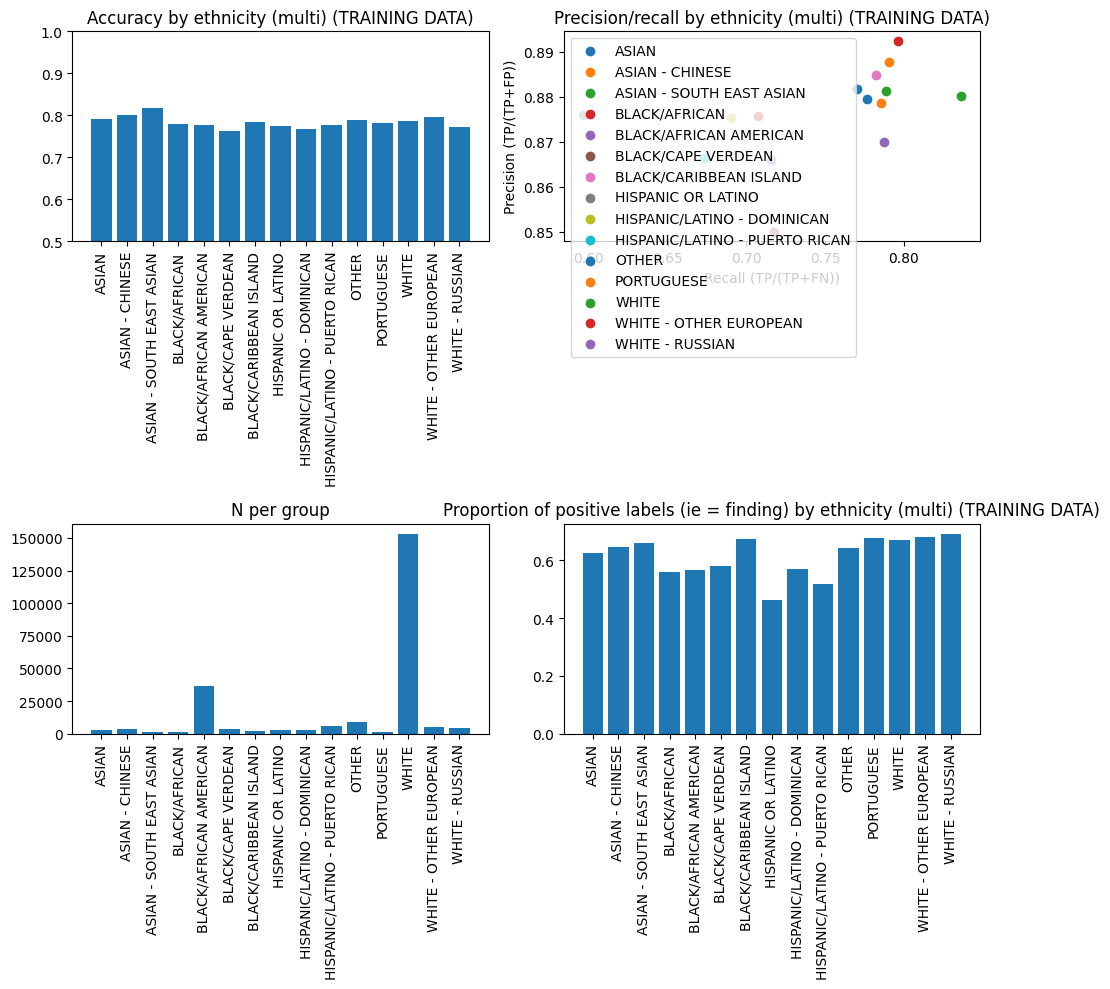

In [37]:
visualise_results(train_df,'ethnicity (multi) (TRAINING DATA)','Race_multi',filter_group_size=True,min_size=1000)

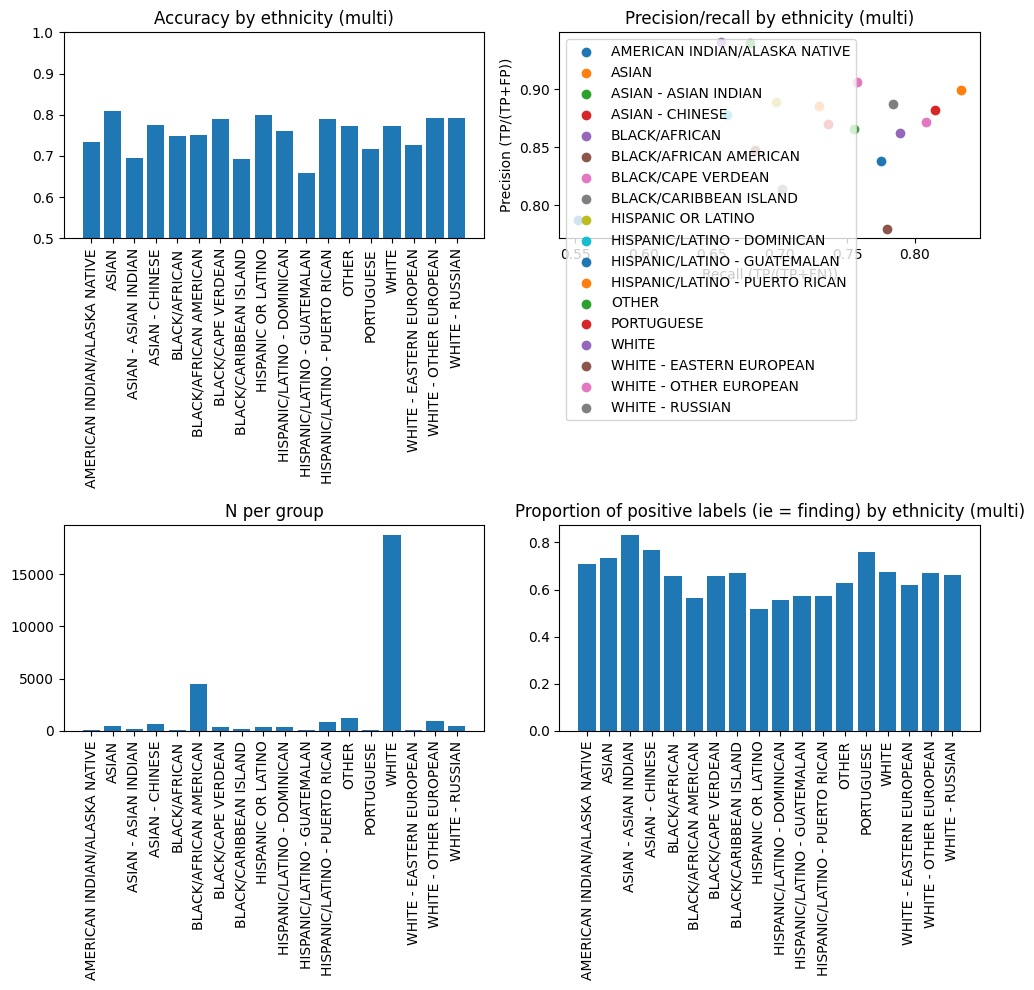

In [41]:
visualise_results(test_df,'ethnicity (multi)','Race_multi',filter_group_size=True,min_size=100)

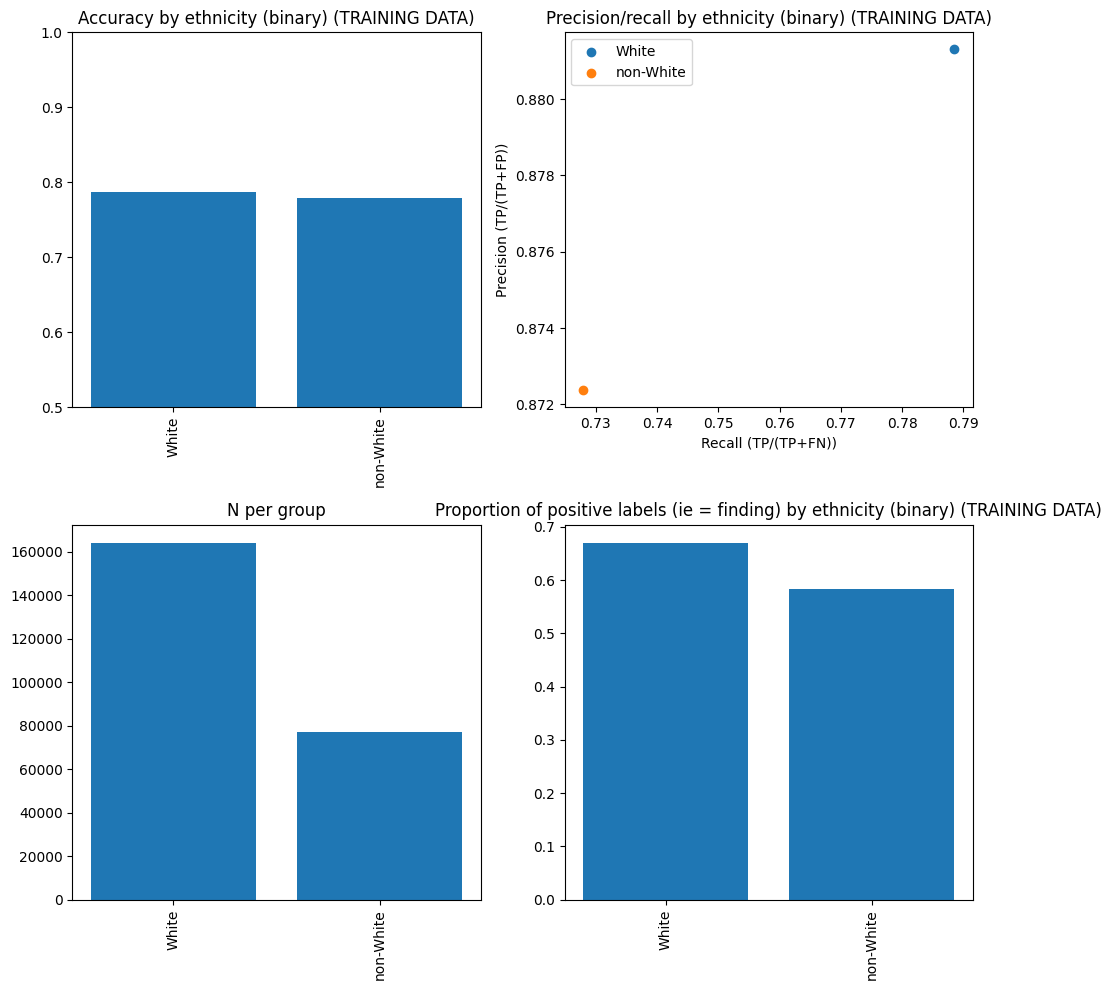

In [44]:
visualise_results(train_df,'ethnicity (binary) (TRAINING DATA)','Race',filter_group_size=True,min_size=1000)

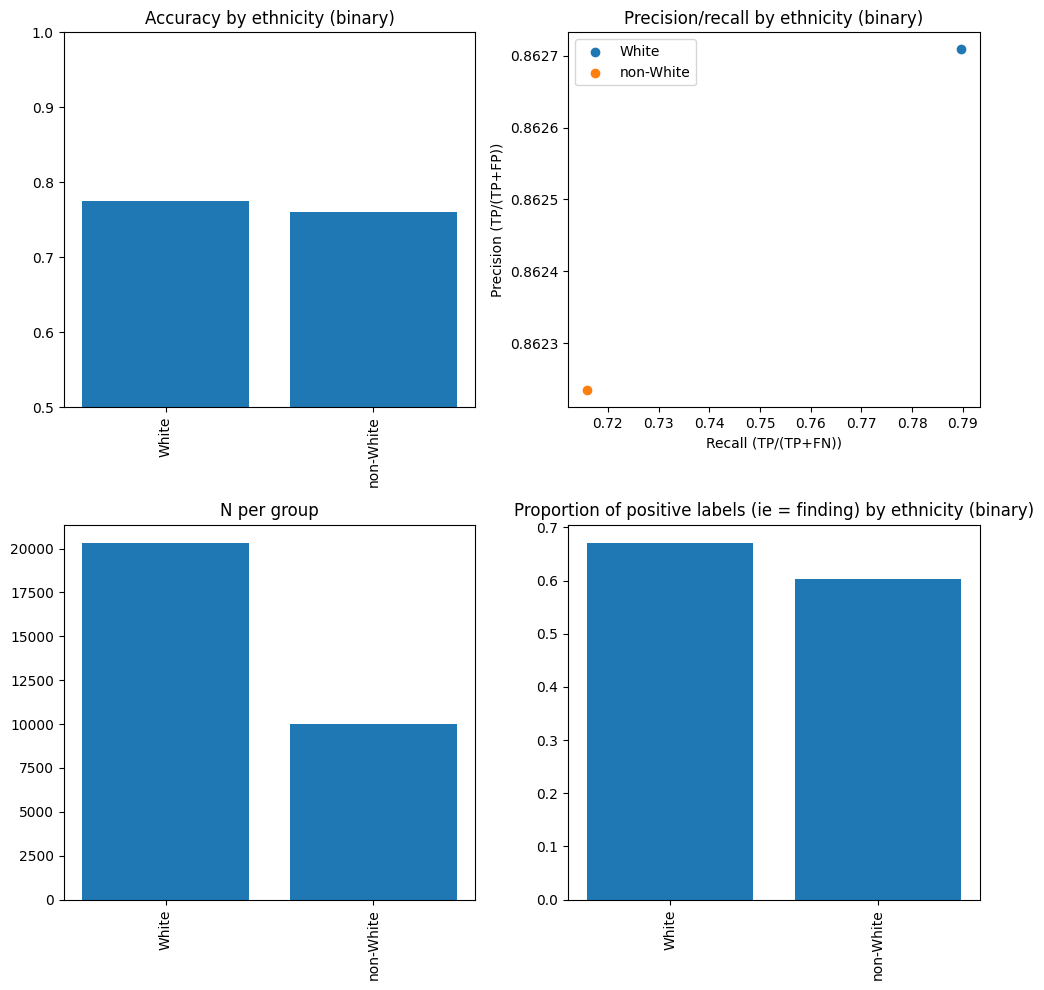

In [42]:
visualise_results(test_df,'ethnicity (binary)','Race',filter_group_size=True,min_size=500)

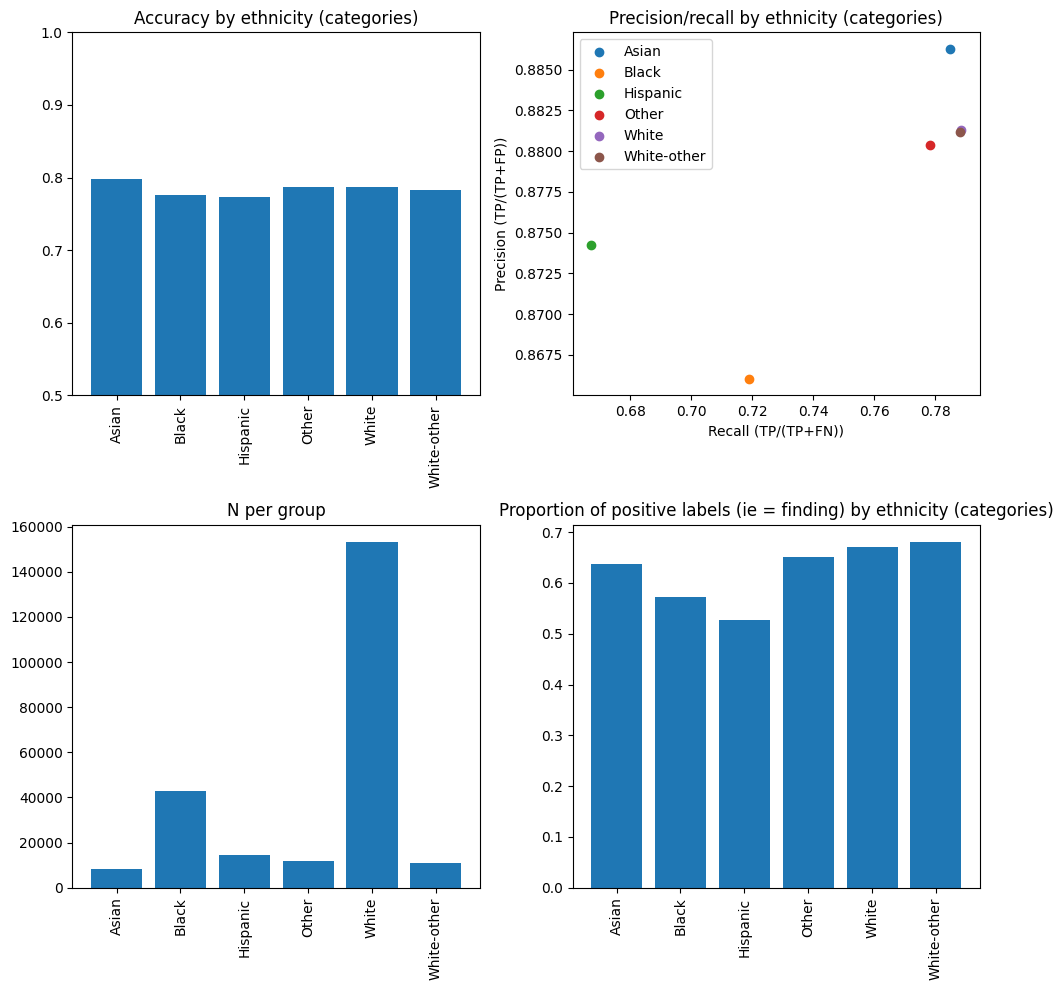

In [45]:
train_df['Race_cat'] = train_df['Race_multi'].apply(lambda x: 'White' if x=='WHITE' else 
                                       'White-other' if 'WHITE -' in x else 
                                       'Hispanic' if 'HISPANIC' in x or 'LATINO' in x or 'MEXICAN' in x or 'CENTRAL AMERICAN' in x or 'CUBAN' in x or 'SALVADORAN' in x or 'GUATEMALAN' in x or 'DOMINICAN' in x or 'COLOMBIAN' in x or 'HONDURAN' in x else 
                                       'Asian' if 'ASIAN' in x or 'CHINESE' in x or 'KOREAN' in x or 'SOUTH EAST ASIAN' in x or 'ASIAN INDIAN' in x else 
                                       'Black' if 'BLACK' in x or 'AFRICAN AMERICAN' in x or 'CARIBBEAN ISLAND' in x or 'CAPE VERDEAN' in x else 
                                       'Other')

visualise_results(train_df,'ethnicity (categories)','Race_cat',filter_group_size=True,min_size=500)

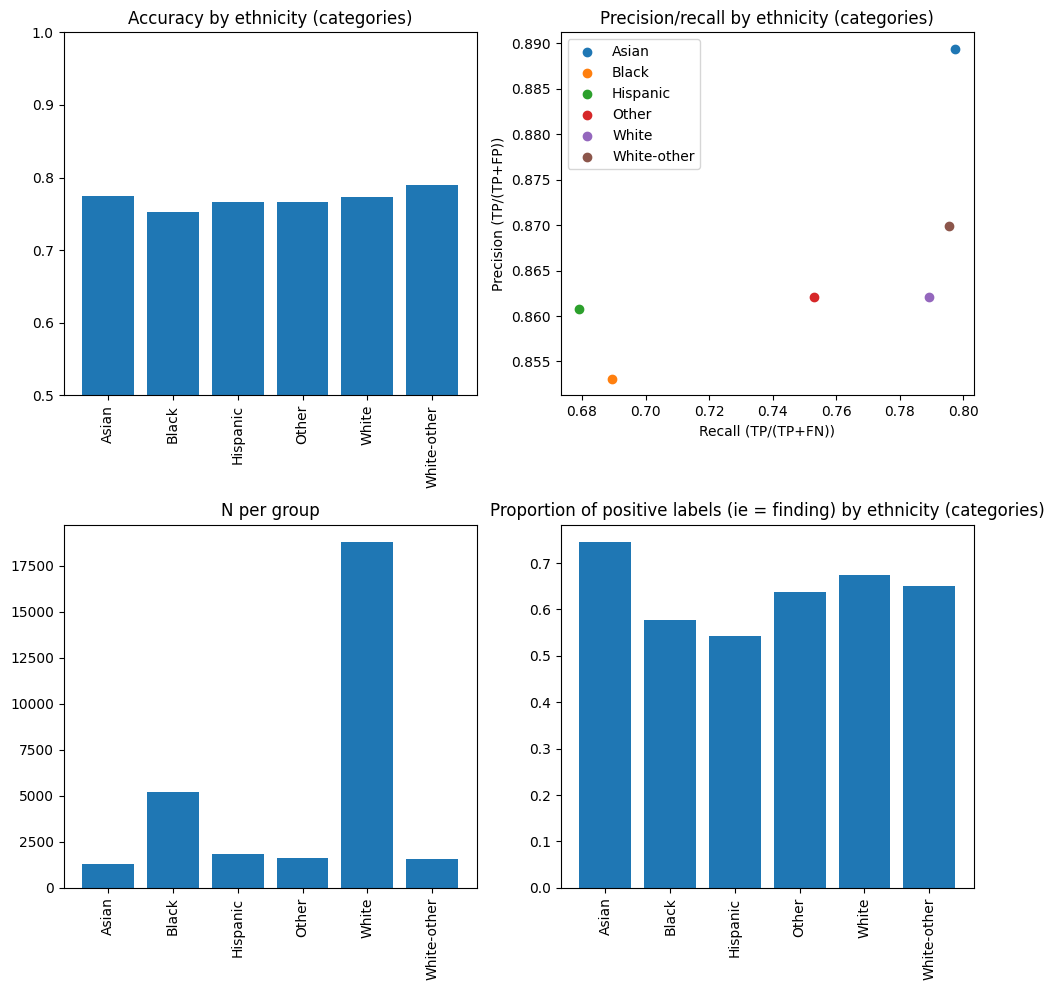

In [31]:
# get more ethnicity categories
test_df['Race_cat'] = test_df['Race_multi'].apply(lambda x: 'White' if x=='WHITE' else 
                                       'White-other' if 'WHITE -' in x else 
                                       'Hispanic' if 'HISPANIC' in x or 'LATINO' in x or 'MEXICAN' in x or 'CENTRAL AMERICAN' in x or 'CUBAN' in x or 'SALVADORAN' in x or 'GUATEMALAN' in x or 'DOMINICAN' in x or 'COLOMBIAN' in x or 'HONDURAN' in x else 
                                       'Asian' if 'ASIAN' in x or 'CHINESE' in x or 'KOREAN' in x or 'SOUTH EAST ASIAN' in x or 'ASIAN INDIAN' in x else 
                                       'Black' if 'BLACK' in x or 'AFRICAN AMERICAN' in x or 'CARIBBEAN ISLAND' in x or 'CAPE VERDEAN' in x else 
                                       'Other')

visualise_results(test_df,'ethnicity (categories)','Race_cat',filter_group_size=True,min_size=500)

## Intersectional analysis

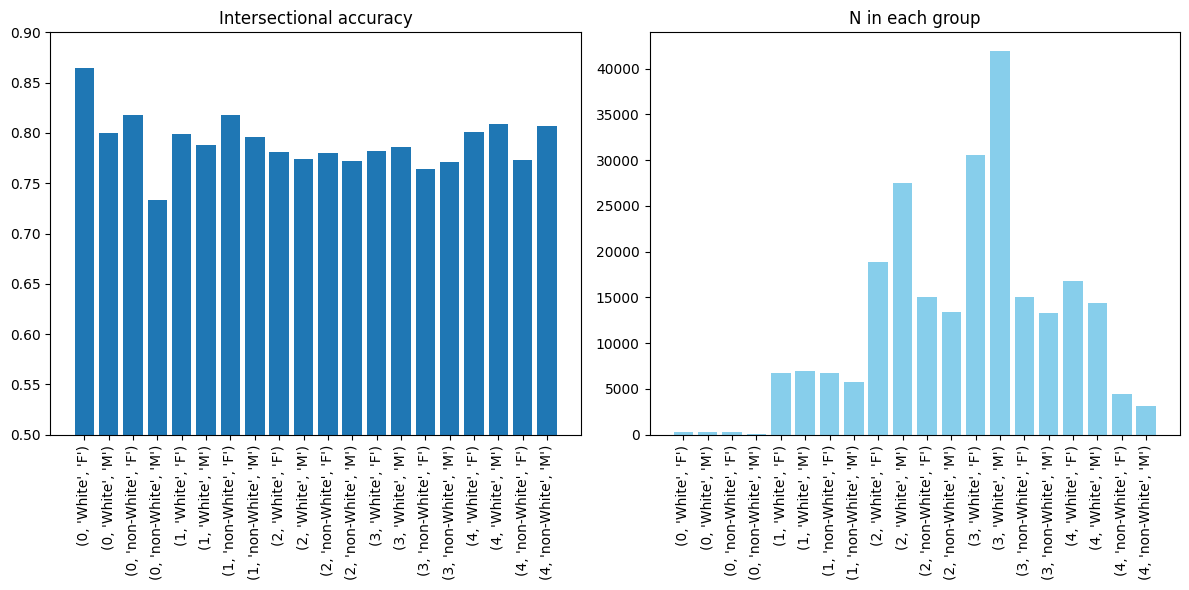

In [47]:
df = train_df

# Group by all 3
grouped_age = df.groupby(['Age_multi','Race','Sex'])
accuracy_age = grouped_age.apply(lambda group: (group['binary_label'] == group['erm_pred']).mean())

# get n for each group
n_groups = grouped_age.apply(lambda group: len(group))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(accuracy_age)), accuracy_age, capsize=5)
plt.title('Intersectional accuracy')
plt.ylim((0.5,0.9))
plt.xticks(range(len(accuracy_age)), accuracy_age.index)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(range(len(accuracy_age)), n_groups, color='skyblue', capsize=5) # yerr=std_dev_ethnicity
plt.title('N in each group')
plt.xticks(range(len(accuracy_age)), accuracy_age.index)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

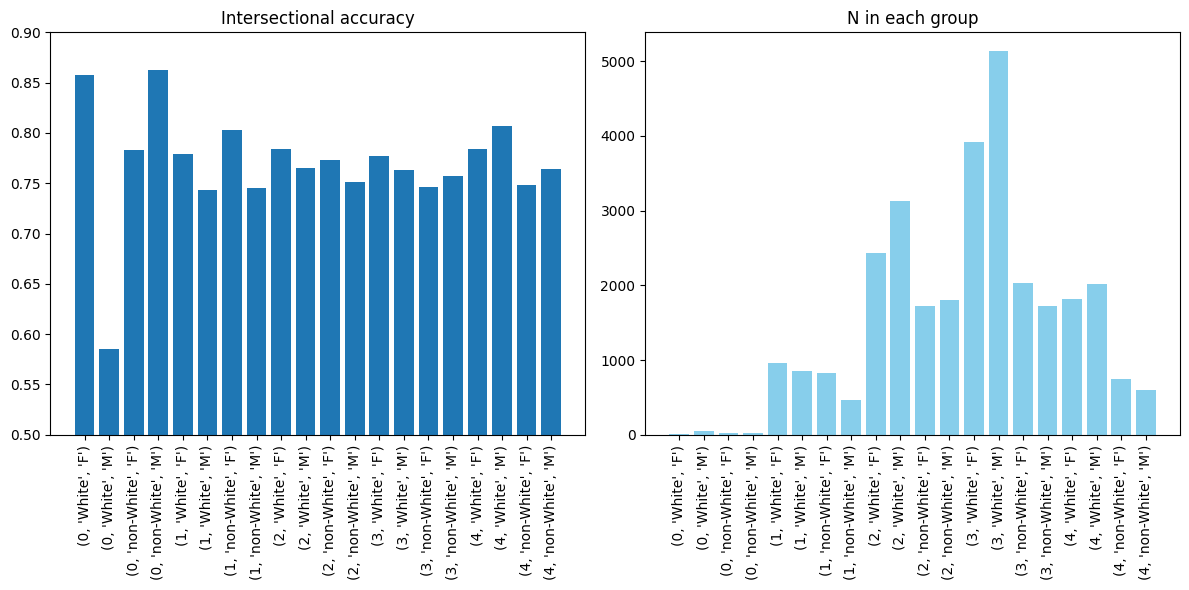

In [32]:
# age:
df = test_df

# Group by all 3
grouped_age = df.groupby(['Age_multi','Race','Sex'])
accuracy_age = grouped_age.apply(lambda group: (group['binary_label'] == group['erm_pred']).mean())

# get n for each group
n_groups = grouped_age.apply(lambda group: len(group))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(accuracy_age)), accuracy_age, capsize=5)
plt.title('Intersectional accuracy')
plt.ylim((0.5,0.9))
plt.xticks(range(len(accuracy_age)), accuracy_age.index)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(range(len(accuracy_age)), n_groups, color='skyblue', capsize=5) # yerr=std_dev_ethnicity
plt.title('N in each group')
plt.xticks(range(len(accuracy_age)), accuracy_age.index)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Other tests

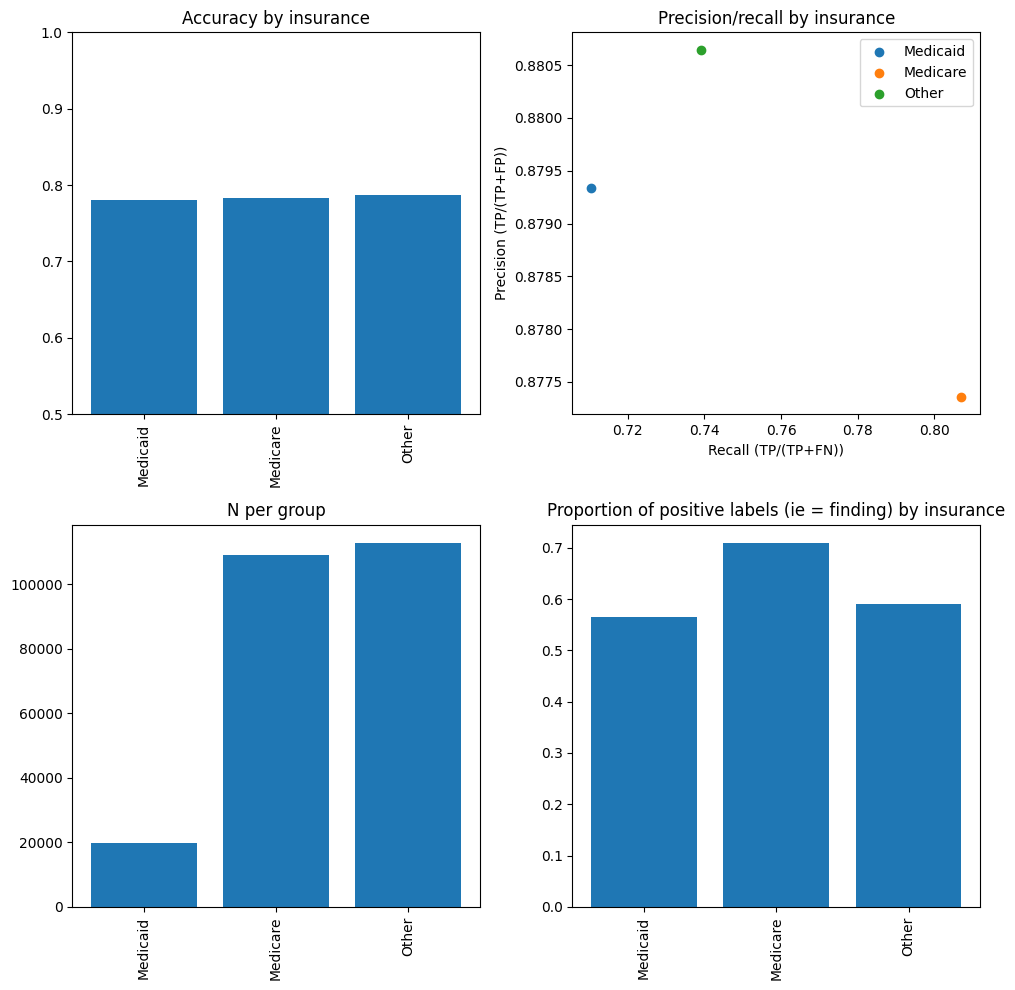

In [48]:
visualise_results(train_df,'insurance','insurance',filter_group_size=True,min_size=500)

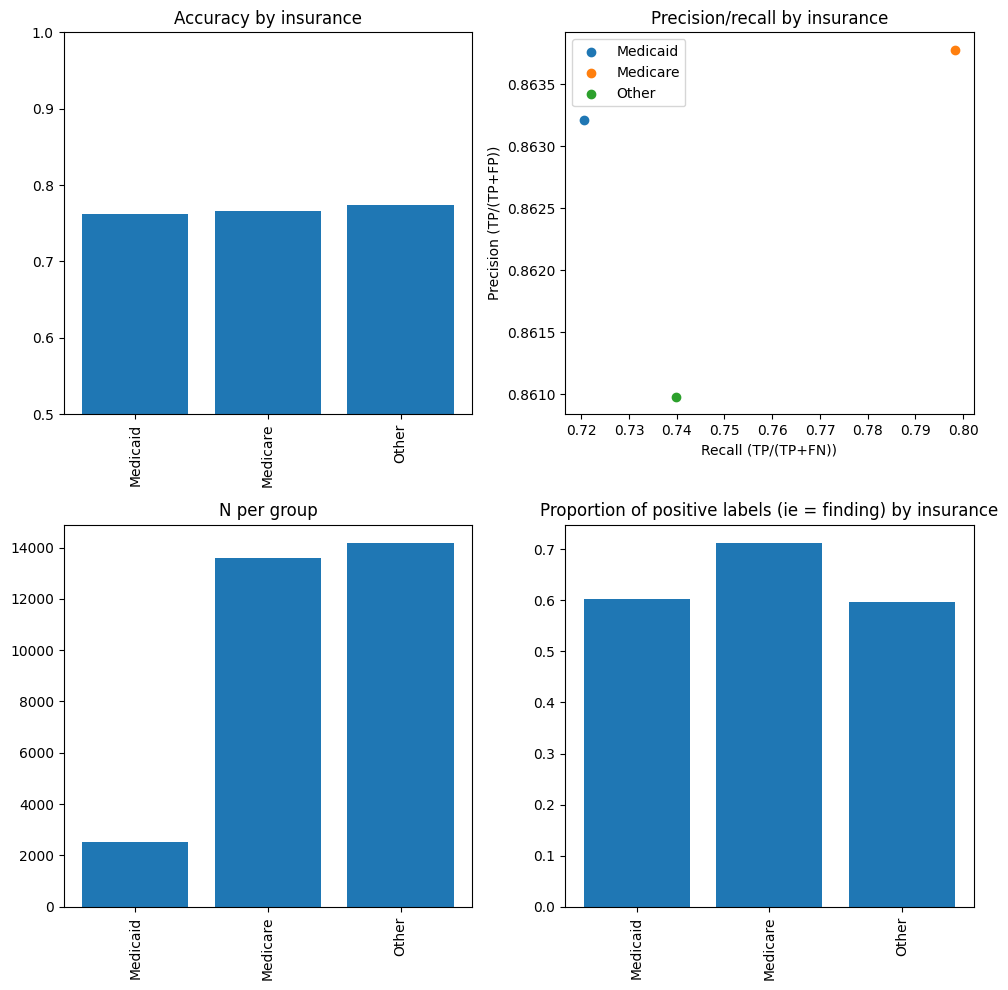

In [33]:
visualise_results(test_df,'insurance','insurance',filter_group_size=True,min_size=500)

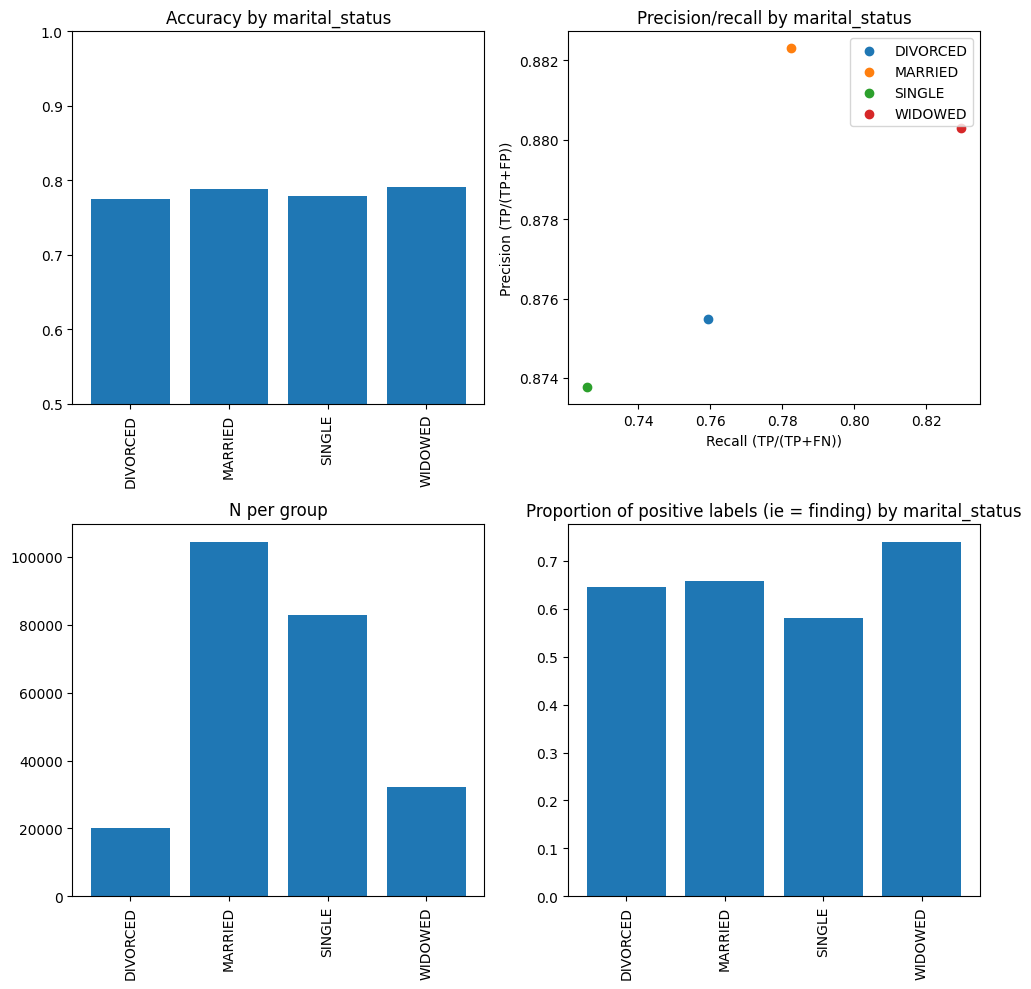

In [49]:
visualise_results(train_df,'marital_status','marital_status',filter_group_size=True,min_size=500)

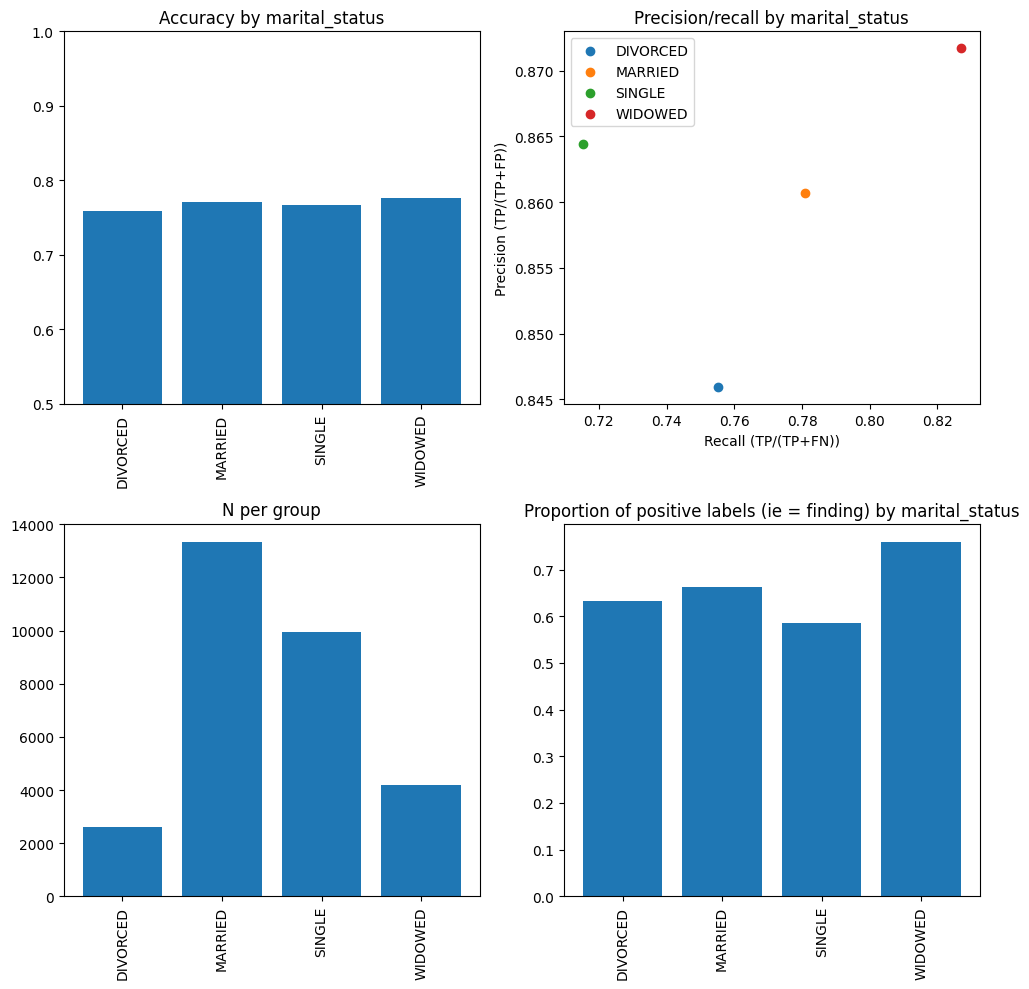

In [34]:
visualise_results(test_df,'marital_status','marital_status',filter_group_size=True,min_size=500)